In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('placement-dataset.csv')

In [4]:
print(df.shape)

(100, 4)


In [5]:
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [6]:
df = df.drop('city', axis=1)

In [8]:
df.shape

(100, 3)

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,NaN,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


<Axes: xlabel='cgpa', ylabel='iq'>

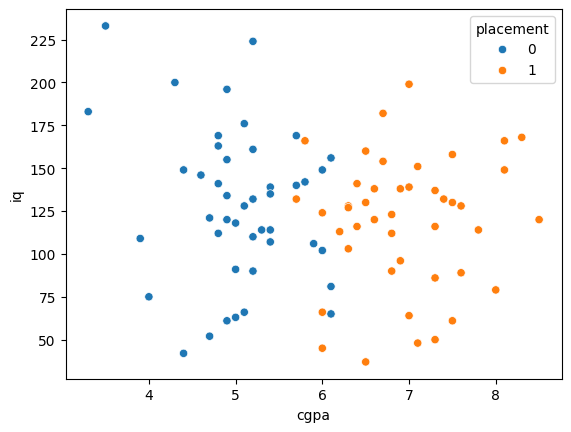

In [11]:
sns.scatterplot( x = df['cgpa'],y = df['iq'], hue =df['placement'])

In [12]:
df = df.dropna()


In [14]:
X = df.drop('placement', axis=1)
y = df['placement']

In [15]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [16]:
p.fit(X,y)

Perceptron()

In [17]:
#finding w1 & w2 values
w1 = p.coef_[0][0]
w2 = p.coef_[0][1]
print(w1,w2)

327.7000000000004 -39.0


In [18]:
#getting Intercept (b value)
p.intercept_

array([10.])

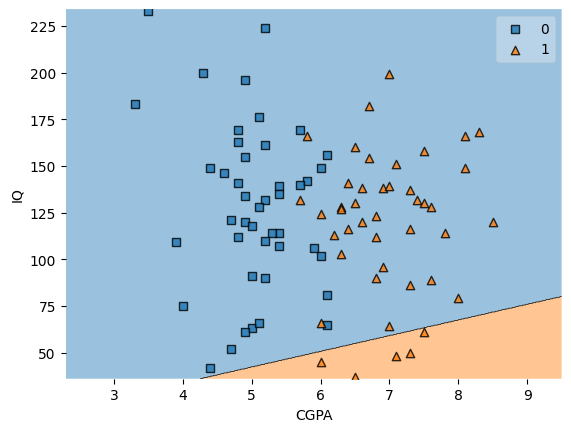

In [19]:
#drawing the decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

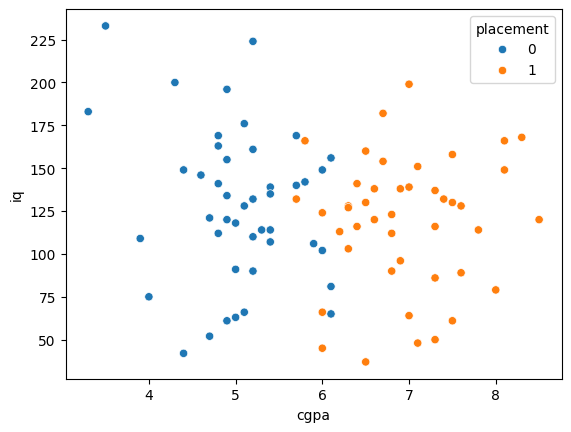

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['cgpa'], y=df['iq'], hue=df['placement'])
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale CGPA and IQ


In [22]:
p.fit(X_scaled,y)

Perceptron()

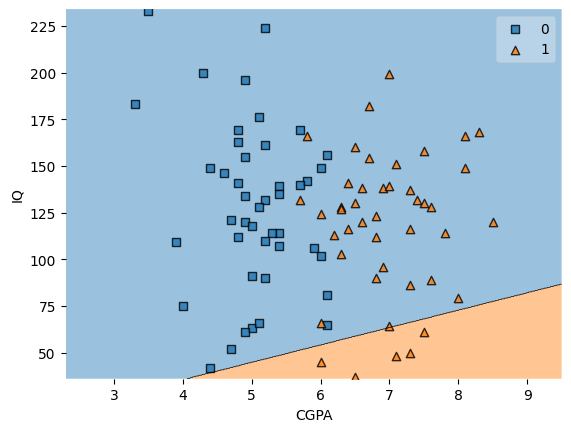

In [23]:
#drawing the decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=p)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [33]:
print(type(df))  # Check if it's a DataFrame
print(df.shape)  # Check its dimensions
print(df.head()) # Display first few rows


<class 'pandas.core.frame.DataFrame'>
(88, 3)
   cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
3   7.4  132.0          1
4   5.8  142.0          0
5   7.1   48.0          1


In [34]:
X = df.iloc[:, :2]  # Selects all rows and first two columns


In [35]:
y = df.iloc[:, -1]  # Selects the last column


In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X)  # Predict using training data
accuracy = accuracy_score(y, y_pred)  # Compute accuracy
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y, y_pred))


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.91      0.95      0.93        44

    accuracy                           0.93        88
   macro avg       0.93      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88



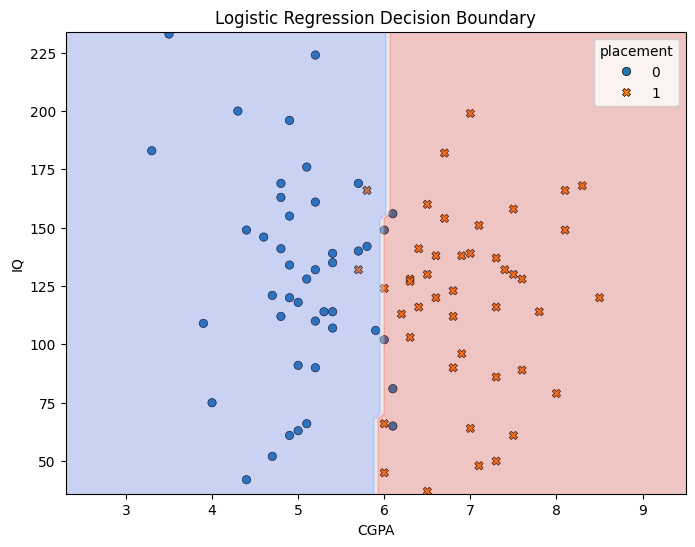

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a mesh grid
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict for the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["cgpa"], y=df["iq"], hue=df["placement"], style=df["placement"], edgecolor="black")
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Logistic Regression Decision Boundary")
plt.show()


In [32]:
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("Logistic Regression Decision Boundary")
plt.show()


InvalidIndexError: (slice(None, None, None), 0)